In [2]:
import os
from torchvision.utils import make_grid
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

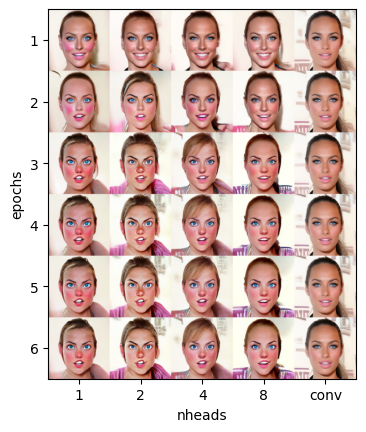

In [60]:
def ablation_epochs_vs_heads(reconstructed=False, image_idx=0, save_img=True):
    basepath = Path("/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/heads_ablation")

    nheads = [1,2,4,8]
    epochs = [0,1,2,3,4,5]

    image_rows = []
    for nhead in nheads:
        image_row = []
        for epoch in epochs:
            if reconstructed:
                image_path = basepath / f"h{nhead}" / f"{epoch}" / "40" / "reconstructed" / f"test_{image_idx}_19_ngen40_reconstructed.png"
            else:
                image_path = basepath / f"h{nhead}" / f"{epoch}" / "40" / "edited" / f"test_{image_idx}_19_ngen40_edited.png"

            # read image
            image_array = np.array(Image.open(image_path).convert('RGB'))
            # if epoch == 0:
            #     image_array[:100] = 0

            image_row.append(image_array)
        row = np.concatenate(image_row, axis=0)
        image_rows.append(row)
    
    # add conv
    basepath = Path("/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/heads_ablation")
    image_row = []
    for epoch in epochs:
        image_path = basepath / "conv" / f"{epoch}" / "40" / "edited" / f"test_{image_idx}_19_ngen40_edited.png"
        image_array = np.array(Image.open(image_path).convert('RGB'))
        image_row.append(image_array)

    # pad with empty image
    # for i in range(2):
    #     image_row.append(np.zeros_like(image_array))
    row = np.concatenate(image_row, axis=0)
    image_rows.append(row)
    # print(image_rows[0].shape)

    image_grid = np.concatenate(image_rows, axis=1)

    fig,ax = plt.subplots(1)
    ax.set_xticks([256] * np.arange(5) + 128, ("1","2","4","8", "conv"))
    ax.set_yticks([256] * np.arange(6) + 128, ("1","2","3","4", "5", "6"))

    ax.set_ylabel('epochs')
    ax.set_xlabel('nheads')
    plt.imshow(image_grid)
    if save_img:
        if reconstructed:
            plt.savefig(f"epochs_vs_heads_img{image_idx}_recon.png", bbox_inches='tight', pad_inches=0, dpi=300)
        else:    
            plt.savefig(f"epochs_vs_heads_img{image_idx}.png", bbox_inches='tight', pad_inches=0, dpi=300)
    plt.show()

# for i in range(5):
ablation_epochs_vs_heads(image_idx=3, reconstructed=False, save_img=True)

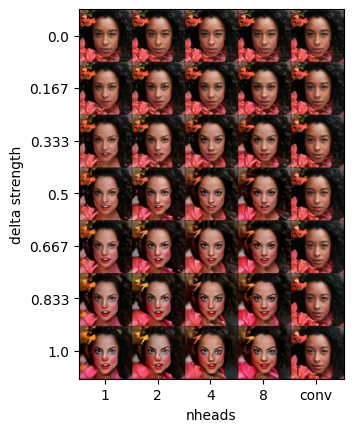

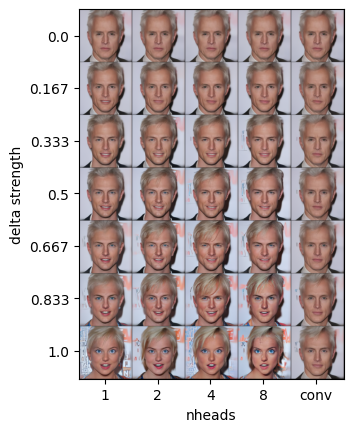

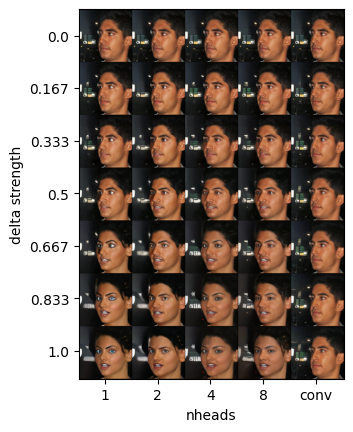

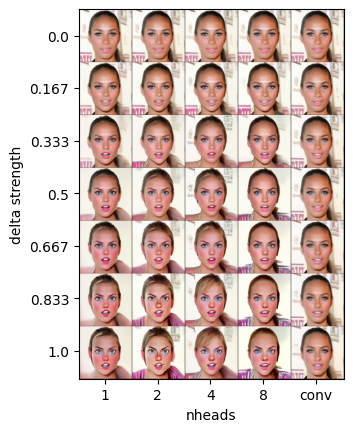

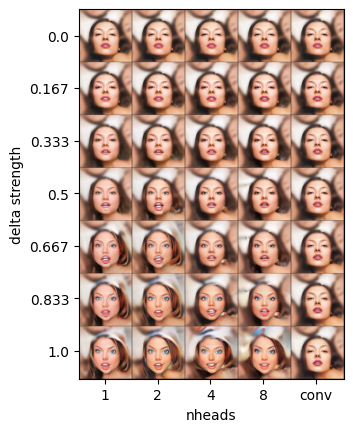

In [66]:
def ablation_epochs_vs_deltas(reconstructed=False, image_idx=0):
    basepath = Path("/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/dstrength_ablation")

    nheads = [1,2,4,8]

    image_cols = []
    for nhead in nheads:
        image_path = basepath / f"h{nhead}" / "40" / f"test_{image_idx}_19_ngen40.png"

        # read image
        image_array = np.array(Image.open(image_path).convert('RGB'))

        image_cols.append(image_array)


    # add conv
    basepath = Path("/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/dstrength_ablation")
    image_path = basepath / "conv" / "5" / "40"/ f"test_{image_idx}_19_ngen40.png"
    image_array = np.array(Image.open(image_path).convert('RGB'))
    image_cols.append(image_array)
    
    image_grid = np.concatenate(image_cols, axis=1)

    fig,ax = plt.subplots(1)
    ax.set_xticks([256] * np.arange(5) + 128, ("1","2","4","8", "conv"))
    # from script
    min_delta = 0
    max_delta = 1
    num_delta = 7
    strengths = np.linspace(min_delta, max_delta, num_delta)
    strengths = [f"{s:.3}" for s in strengths]
    ax.set_yticks([256] * np.arange(7) + 128, strengths)
    ax.set_ylabel('delta strength')
    ax.set_xlabel('nheads')
    plt.imshow(image_grid)
    plt.savefig(f"dstrength_vs_heads_img{image_idx}.png", bbox_inches='tight', pad_inches=0, dpi=300)
    # plt.show()

for i in range(5):
    ablation_epochs_vs_deltas(image_idx=i)

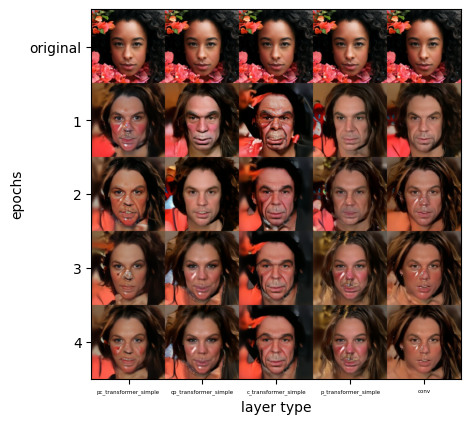

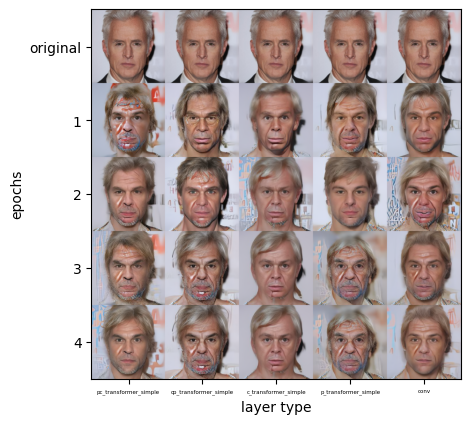

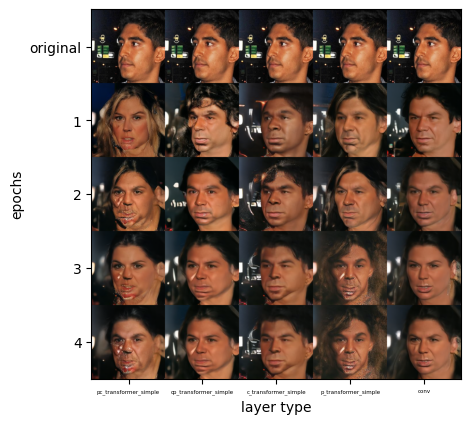

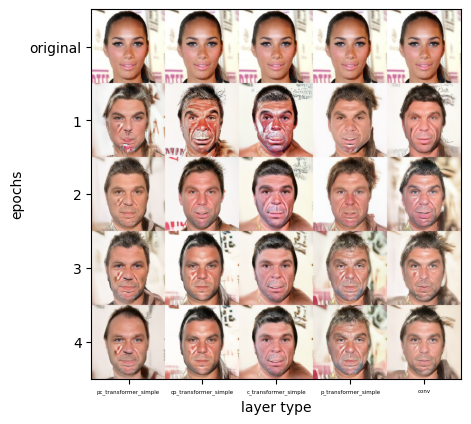

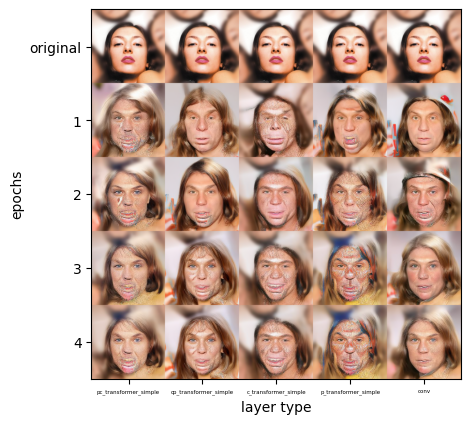

In [33]:
def ablation_epochs_vs_layer(reconstructed=False, image_idx=0):
    basepath = Path("/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/layertype_ablation")

    layertype = ['pc_transformer_simple', 'cp_transformer_simple', 'c_transformer_simple', 'p_transformer_simple', 'conv']
    # epochs = [0,1,2,3,4,5]
    epochs = [-1, 0,1,2,3]

    image_rows = []

    for layer in layertype:
        image_row = []
        # add original image
        image_path = basepath / f"{layer}" / "0" / "40" / "original" / f"test_{image_idx}_19_ngen40_original.png"
        image_array = np.array(Image.open(image_path).convert('RGB'))
        image_row.append(image_array)

        for epoch in epochs:
            #skip first epoch as its for original images
            if epoch == -1:
                continue

            image_path = basepath / f"{layer}" / f"{epoch}" / "40" / "edited" / f"test_{image_idx}_19_ngen40_edited.png"

            # read image
            image_array = np.array(Image.open(image_path).convert('RGB'))
            # if epoch == 0:
            #     image_array[:100] = 0

            image_row.append(image_array)
        row = np.concatenate(image_row, axis=0)
        image_rows.append(row)
    image_grid = np.concatenate(image_rows, axis=1)

    fig,ax = plt.subplots(1)
    ax.set_xticks([256] * np.arange(len(layertype)) + 128, layertype)
    ax.set_yticks([256] * np.arange(len(epochs)) + 128, ("original", "1","2", "3", "4"))
    ax.set_ylabel('epochs')
    ax.set_xlabel('layer type')
    # for tick in ax.get_xticklabels():
    #     tick.set_rotation(45)
    
    plt.imshow(image_grid)
    # plt.savefig(f"epochs_vs_layer_img{image_idx}.png", bbox_inches='tight', pad_inches=0, dpi=300)

    plt.show()

plt.rc('xtick', labelsize=4)
for i in range(5):
    ablation_epochs_vs_layer(image_idx=i)

# FID & Direction Clip loss calculations

In [4]:
import json
import os
import sys
from glob import glob
from pathlib import Path

import torch
import torchvision.transforms as transforms
from PIL import Image
from pytorch_fid import fid_score
from tqdm import tqdm

# make imports work from the asyrp repository
sys.path.append("../")

from losses.clip_loss import CLIPLoss
from utils.text_dic import SRC_TRG_TXT_DIC
from IPython.utils import io

device = "cuda:0"

clip_loss_func = CLIPLoss(
            device,
            lambda_direction=1,
            lambda_patch=0,
            lambda_global=0,
            lambda_manifold=0,
            lambda_texture=0,
            direction_loss_type='cosine',
            clip_model='ViT-B/32')

# Disable


In [3]:
transform = transforms.Compose([
    transforms.PILToTensor()
])

guid = "smiling"

total_clip_loss = 0
(src_texts, target_texts) = SRC_TRG_TXT_DIC[guid]
for i in range(5):
    with torch.no_grad():
        # path1 = f"/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/heads_ablation/h1/0/40/edited/test_1_19_ngen40_edited.png"
        # path2 = f"/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/layertype_ablation/conv/0/40/edited/test_{i}_19_ngen40_edited.png"
        # path3 = f"/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/layertype_ablation/conv/0/40/reconstructed/test_{i}_19_ngen40_reconstructed.png"
        
        path2 = f"/home/parting/master_AI/DL2/DL2-2023-group-15/src/runs/smiling_LC_CelebA_HQ_t999_ninv50_ngen50/test_images/50/edited/test_{i}_4_ngen50_edited.png"
        path3 = f"/home/parting/master_AI/DL2/DL2-2023-group-15/src/runs/smiling_LC_CelebA_HQ_t999_ninv50_ngen50/test_images/50/reconstructed/test_{i}_4_ngen50_reconstructed.png"
        src_img = Image.open(path2)
        target_img = Image.open(path3)

        src_img_tensor = transform(src_img).float().to(device)[None, :]
        target_img_tensor = transform(target_img).float().to(device)[None, :]

        clip_loss = clip_loss_func.clip_directional_loss(src_img_tensor, src_texts, target_img_tensor, target_texts)
        # clip_loss = -torch.log((2 - cosine_distance) / 2)
        # print(i, cosine_distance)
        # print(clip_loss)
        # print("="*50)

        # del src_img_tensor, target_img_tensor
        total_clip_loss += clip_loss

total_clip_loss / 5

tensor(1.0469, device='cuda:0', dtype=torch.float16)

In [86]:
target_direction = clip_loss_func.compute_text_direction(src_texts, target_texts)
target_direction.shape

torch.Size([1, 512])

In [87]:
clip_loss_func.direction_loss

DirectionLoss(
  (loss_func): CosineSimilarity()
)

In [88]:
src_encoding = clip_loss_func.get_image_features(src_img_tensor)
target_encoding = clip_loss_func.get_image_features(target_img_tensor)
src_encoding.shape

torch.Size([1, 512])

In [89]:
edit_direction = (target_encoding - src_encoding)

In [90]:
edit_direction_normed = edit_direction / (edit_direction.clone().norm(dim=-1, keepdim=True) + 1e-7)

In [91]:
clip_loss_func.direction_loss(edit_direction_normed, clip_loss_func.target_direction).mean()

tensor(0.9722, device='cuda:0', dtype=torch.float16, grad_fn=<MeanBackward0>)

In [93]:
import torch.nn as nn
cos = nn.CosineSimilarity(dim=1, eps=1e-8)


In [99]:
cos(edit_direction_normed, clip_loss_func.target_direction)

tensor([0.0279], device='cuda:0', dtype=torch.float16, grad_fn=<SumBackward1>)

In [68]:
clip_loss_func.target_direction.shape

torch.Size([1, 512])

In [66]:
clip_loss_func.direction_loss(edit_direction, clip_loss_func.target_direction)

tensor([1.0342], device='cuda:0', dtype=torch.float16, grad_fn=<RsubBackward1>)

In [100]:
def calculate_clip_loss(image_folder_path, guid):
    (src_texts, target_texts) = SRC_TRG_TXT_DIC[guid]

    transform = transforms.Compose([
        transforms.PILToTensor()
    ])

    images = glob(image_folder_path + "/*.png")
    total_clip_loss = 0
    total_clip_similarity = 0
    with torch.no_grad():
        for image_path in tqdm(images, total=len(images), desc="parsing images for clip loss"):
            src_img = Image.open(image_path.replace("edited", "reconstructed"))
            # print()
            target_img = Image.open(image_path)

            src_img_tensor = transform(src_img).float().to(device)[None, :]
            target_img_tensor = transform(target_img).float().to(device)[None, :]

            loss = clip_loss_func.clip_directional_loss(src_img_tensor, src_texts, target_img_tensor, target_texts)
            clip_similarity = 1 - loss

            # cosine_similarity = 1 - cosine_distance
            # print(clip_similarity)

            del src_img_tensor, target_img_tensor
            total_clip_loss += loss
            total_clip_similarity += clip_similarity

    return total_clip_loss / len(images), total_clip_similarity / len(images)


In [19]:
from torchmetrics.image.fid import FrechetInceptionDistance

def calculate_fid(image_folder_path_src, image_folder_path_target):

    transform = transforms.Compose([
        transforms.PILToTensor()
    ])

    fid = FrechetInceptionDistance(feature=2048)

    images_src_path = glob(image_folder_path_src + "/*.png")
    images_target_path = glob(image_folder_path_target + "/*.png")

    images_src_tensors = []
    for image_path in tqdm(images_src_path, total=len(images_src_path), desc="parsing src images for fid"):
        src_img = Image.open(image_path)

        src_img_tensor = transform(src_img).to(torch.uint8)
        images_src_tensors.append(src_img_tensor)

    all_src_tensor = torch.stack(images_src_tensors, dim=0)
    fid.update(all_src_tensor, real=True)

    images_target_tensors = []
    for image_path in tqdm(images_target_path, total=len(images_target_path), desc="parsing target images for fid"):
        target_img = Image.open(image_path)

        target_img_tensor = transform(target_img).to(torch.uint8)
        images_target_tensors.append(target_img_tensor)
    
    all_target_tensor = torch.stack(images_target_tensors, dim=0)
    fid.update(all_target_tensor, real=False)

    fid_s = fid.compute()
    
    return fid_s.item()

In [20]:
# see text in text_dic.py
guid = "pixar"

head_abl_path = Path("/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/heads_ablation")
layer_abl_path = Path("/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/layertype_ablation")
basepaths = [head_abl_path,layer_abl_path]
results = {}

for basepath in basepaths:
    print(f'walking from: {basepath}')
    for path in os.walk(basepath, topdown=False):

        # find ablation paths
        if "40/edited" in str(path):
            print(f"parsing: {path[0]}")
            # path magic
            epoch = path[0].split("/40")[0][-1]
            ablation_type = path[0].split("eval_runs/")[-1]
            ablation_type = ablation_type.split("/40")[0]
            ablation_type, epoch = ablation_type[:-2], ablation_type[-1:]
            
            path_edited = path[0]
            path_recon = path[0].replace("edited", "reconstructed")
            path_original = path[0].replace("edited", "original")
            
            # mean_clip_direction_loss, mean_clip_similarity = calculate_clip_loss(path_edited, guid)
            # print("=" * 50)
            # print(f"ablation: '{ablation_type}' on epoch {epoch}, gives mean clip direction loss: {mean_clip_direction_loss}")
            # print(f"ablation: '{ablation_type}' on epoch {epoch}, gives mean clip similarity: {mean_clip_similarity}")

            score_er = calculate_fid(path_edited, path_recon)
            score_ro = calculate_fid(path_original, path_recon)
            score_eo = calculate_fid(path_edited, path_original)
            print("calculating FID")
            # with io.capture_output() as captured:
            # # fid scores
            #     score_er = fid_score.calculate_fid_given_paths(
            #         [path_edited, path_recon],
            #         batch_size=1,
            #         device="cuda:0",
            #         dims=2048
            #     )
            #     # score_eo = fid_score.calculate_fid_given_paths(
            #     #     [path_edited, path_original],
            #     #     batch_size=1,
            #     #     device="cuda:0",
            #     #     dims=2048
            #     # )
            #     score_ro = fid_score.calculate_fid_given_paths(
            #         [path_recon, path_original],
            #         batch_size=1,
            #         device="cuda:0",
            #         dims=2048
            #     )

            print(f"ablation: '{ablation_type}' on epoch {epoch}, gives FID: {score_er} between edited and reconstructed")
            print(f"ablation: '{ablation_type}' on epoch {epoch}, gives FID: {score_eo} between edited and original")
            print(f"ablation: '{ablation_type}' on epoch {epoch}, gives FID: {score_ro} between reconstructed and original")
            print("+" * 50)
            run_results = {
                "fid_edited_reconstructed": score_er,
                "fid_edited_original": score_eo,
                "fid_reconstructed_original": score_ro,
                "epochs": epoch,
                "ablation_name": ablation_type
            }
            
            results[ablation_type + f"_{epoch}"] = run_results


walking from: /home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/heads_ablation
parsing: /home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/heads_ablation/h2/3/40/edited


parsing target images for fid: 100%|██████████| 100/100 [00:00<00:00, 584.72it/s]


calculating FID
ablation: 'heads_ablation/h2' on epoch 3, gives FID: 84.81935119628906 between edited and reconstructed
ablation: 'heads_ablation/h2' on epoch 3, gives FID: 111.13562774658203 between edited and original
ablation: 'heads_ablation/h2' on epoch 3, gives FID: 96.3109359741211 between reconstructed and original
++++++++++++++++++++++++++++++++++++++++++++++++++
parsing: /home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/heads_ablation/h2/4/40/edited


parsing target images for fid: 100%|██████████| 100/100 [00:00<00:00, 561.45it/s]


calculating FID
ablation: 'heads_ablation/h2' on epoch 4, gives FID: 85.90817260742188 between edited and reconstructed
ablation: 'heads_ablation/h2' on epoch 4, gives FID: 112.19422149658203 between edited and original
ablation: 'heads_ablation/h2' on epoch 4, gives FID: 96.3109359741211 between reconstructed and original
++++++++++++++++++++++++++++++++++++++++++++++++++
parsing: /home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/heads_ablation/h2/0/40/edited


parsing target images for fid: 100%|██████████| 100/100 [00:00<00:00, 537.70it/s]


calculating FID
ablation: 'heads_ablation/h2' on epoch 0, gives FID: 79.99241638183594 between edited and reconstructed
ablation: 'heads_ablation/h2' on epoch 0, gives FID: 108.94850158691406 between edited and original
ablation: 'heads_ablation/h2' on epoch 0, gives FID: 96.3109359741211 between reconstructed and original
++++++++++++++++++++++++++++++++++++++++++++++++++
parsing: /home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/heads_ablation/h2/2/40/edited


parsing target images for fid: 100%|██████████| 100/100 [00:00<00:00, 573.95it/s]


calculating FID
ablation: 'heads_ablation/h2' on epoch 2, gives FID: 84.6474838256836 between edited and reconstructed
ablation: 'heads_ablation/h2' on epoch 2, gives FID: 111.55937957763672 between edited and original
ablation: 'heads_ablation/h2' on epoch 2, gives FID: 96.3109359741211 between reconstructed and original
++++++++++++++++++++++++++++++++++++++++++++++++++
parsing: /home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/heads_ablation/h2/5/40/edited


parsing target images for fid: 100%|██████████| 100/100 [00:00<00:00, 593.05it/s]


calculating FID
ablation: 'heads_ablation/h2' on epoch 5, gives FID: 86.389404296875 between edited and reconstructed
ablation: 'heads_ablation/h2' on epoch 5, gives FID: 112.79891204833984 between edited and original
ablation: 'heads_ablation/h2' on epoch 5, gives FID: 96.3109359741211 between reconstructed and original
++++++++++++++++++++++++++++++++++++++++++++++++++
parsing: /home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/heads_ablation/h2/1/40/edited


parsing target images for fid: 100%|██████████| 100/100 [00:00<00:00, 566.93it/s]


calculating FID
ablation: 'heads_ablation/h2' on epoch 1, gives FID: 81.68265533447266 between edited and reconstructed
ablation: 'heads_ablation/h2' on epoch 1, gives FID: 112.79029083251953 between edited and original
ablation: 'heads_ablation/h2' on epoch 1, gives FID: 96.3109359741211 between reconstructed and original
++++++++++++++++++++++++++++++++++++++++++++++++++
parsing: /home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/heads_ablation/conv/3/40/edited


parsing target images for fid: 100%|██████████| 5/5 [00:00<00:00, 478.83it/s]


calculating FID
ablation: 'heads_ablation/conv' on epoch 3, gives FID: 115.37224578857422 between edited and reconstructed
ablation: 'heads_ablation/conv' on epoch 3, gives FID: 166.9228057861328 between edited and original
ablation: 'heads_ablation/conv' on epoch 3, gives FID: 142.5576934814453 between reconstructed and original
++++++++++++++++++++++++++++++++++++++++++++++++++
parsing: /home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/heads_ablation/conv/4/40/edited


parsing target images for fid: 100%|██████████| 5/5 [00:00<00:00, 542.35it/s]


calculating FID
ablation: 'heads_ablation/conv' on epoch 4, gives FID: 113.12640380859375 between edited and reconstructed
ablation: 'heads_ablation/conv' on epoch 4, gives FID: 164.341064453125 between edited and original
ablation: 'heads_ablation/conv' on epoch 4, gives FID: 142.5576934814453 between reconstructed and original
++++++++++++++++++++++++++++++++++++++++++++++++++
parsing: /home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/heads_ablation/conv/0/40/edited


parsing target images for fid: 100%|██████████| 100/100 [00:00<00:00, 308.08it/s]


In [8]:
results

{'heads_ablation/h2_3': {'fid_edited_reconstructed': 84.47347487764245,
  'fid_edited_original': 111.06096532922817,
  'fid_reconstructed_original': 96.11018473790887,
  'epochs': '3',
  'ablation_name': 'heads_ablation/h2'},
 'heads_ablation/h2_4': {'fid_edited_reconstructed': 85.71210478505645,
  'fid_edited_original': 112.36607443354785,
  'fid_reconstructed_original': 96.11018473790887,
  'epochs': '4',
  'ablation_name': 'heads_ablation/h2'},
 'heads_ablation/h2_0': {'fid_edited_reconstructed': 79.65859607722328,
  'fid_edited_original': 108.85650741177511,
  'fid_reconstructed_original': 96.11018473790887,
  'epochs': '0',
  'ablation_name': 'heads_ablation/h2'},
 'heads_ablation/h2_2': {'fid_edited_reconstructed': 84.34884604921417,
  'fid_edited_original': 111.49100344145654,
  'fid_reconstructed_original': 96.11018473790887,
  'epochs': '2',
  'ablation_name': 'heads_ablation/h2'},
 'heads_ablation/h2_5': {'fid_edited_reconstructed': 86.15020206171044,
  'fid_edited_original':

In [15]:
results.keys()

dict_keys(['heads_ablation/h2_3', 'heads_ablation/h2_4', 'heads_ablation/h2_0', 'heads_ablation/h2_2', 'heads_ablation/h2_5', 'heads_ablation/h2_1', 'heads_ablation/h1_3', 'heads_ablation/h1_4', 'heads_ablation/h1_0', 'heads_ablation/h1_2', 'heads_ablation/h1_5', 'heads_ablation/h1_1', 'heads_ablation/h8_3', 'heads_ablation/h8_4', 'heads_ablation/h8_0', 'heads_ablation/h8_2', 'heads_ablation/h8_5', 'heads_ablation/h8_1', 'heads_ablation/h4_3', 'heads_ablation/h4_4', 'heads_ablation/h4_0', 'heads_ablation/h4_2', 'heads_ablation/h4_5', 'heads_ablation/h4_1', 'layertype_ablation/cp_transformer_simple_3', 'layertype_ablation/cp_transformer_simple_0', 'layertype_ablation/cp_transformer_simple_2', 'layertype_ablation/cp_transformer_simple_1', 'layertype_ablation/c_transformer_simple_3', 'layertype_ablation/c_transformer_simple_0', 'layertype_ablation/c_transformer_simple_2', 'layertype_ablation/c_transformer_simple_1', 'layertype_ablation/conv_3', 'layertype_ablation/conv_0', 'layertype_abla

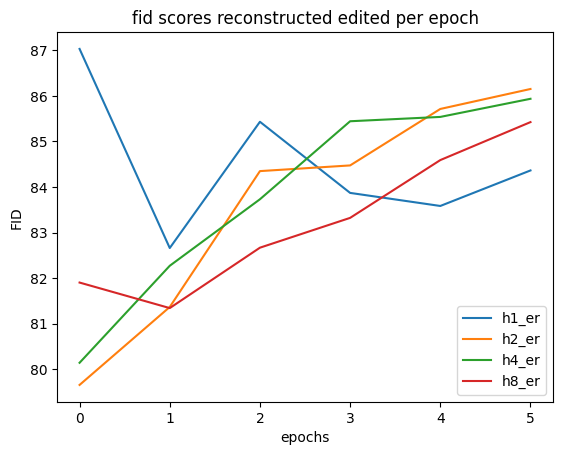

In [48]:
import matplotlib.pyplot as plt

for h in ['h1', 'h2', 'h4', 'h8']:
    fid_er = [(results[k]['fid_edited_reconstructed'], results[k]['epochs']) for k in results.keys() if h in k]
    fid_er = sorted(fid_er, key=lambda x: x[1])
    fid_er = [t[0] for t in fid_er]
    plt.plot(range(len(fid_er)), fid_er, label=h + "_er")

# for h in ['h1', 'h2', 'h4', 'h8']:
#     fid_er = [(results[k]['fid_edited_original'], results[k]['epochs']) for k in results.keys() if h in k]
#     fid_er = sorted(fid_er, key=lambda x: x[1])
#     fid_er = [t[0] for t in fid_er]
#     plt.plot(range(len(fid_er)), fid_er, label=h+ "_eo")

# fid_eo = [(results[key]['fid_edited_original'], results[key]['epochs']) for key in results.keys()]
# fid_eo = sorted(fid_eo, key=lambda x: x[1])
# fid_eo = [t[0] for t in fid_eo]

# plt.plot(range(len(fid_eo)), fid_eo)
plt.title("fid scores reconstructed edited per epoch")
plt.xlabel("epochs")
plt.ylabel("FID")
plt.legend()
plt.show()

In [45]:
list(set(layertypes))

['pc_transformer_simple',
 'cp_transformer_simple',
 'p_transformer_simple',
 'c_transformer_simple',
 'conv']

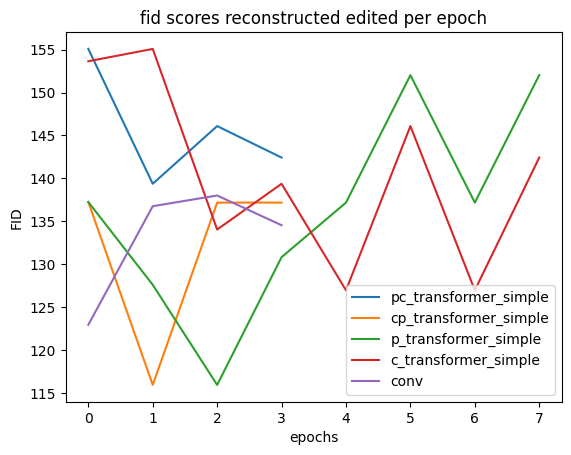

In [46]:
import matplotlib.pyplot as plt

layertypes = [k for k in results.keys() if "layertype_ablation" in k]
layertypes = list(set([k.split("/")[-1][:-2] for k in layertypes]))

for h in layertypes:
    fid_er = [(results[k]['fid_edited_reconstructed'], results[k]['epochs']) for k in results.keys() if h in k]
    fid_er = sorted(fid_er, key=lambda x: x[1])
    fid_er = [t[0] for t in fid_er]
    plt.plot(range(len(fid_er)), fid_er, label=h)

# fid_eo = [(results[key]['fid_edited_original'], results[key]['epochs']) for key in results.keys()]
# fid_eo = sorted(fid_eo, key=lambda x: x[1])
# fid_eo = [t[0] for t in fid_eo]

# plt.plot(range(len(fid_eo)), fid_eo)
plt.title("fid scores reconstructed edited per epoch")
plt.xlabel("epochs")
plt.ylabel("FID")
plt.legend()
plt.show()

In [10]:
# write results to json file
with open("fid_scores.json", "w") as f:
    f.write(json.dumps(results, indent=4))
    results